In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

In [36]:
data = pd.read_csv("/Users/julia/CSUEB/Fall2023/AdvancedAI/irisNew/iris.csv")
data
#1 is Setosa
#2 is Versicolor
#3 is Virginica

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [37]:
data['variety'] = data['variety'].replace('Setosa', 1)
data['variety'] = data['variety'].replace('Versicolor', 2)
data['variety'] = data['variety'].replace('Virginica', 3)

In [38]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [39]:
data.corr()

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
variety,0.782561,-0.426658,0.949035,0.956547,1.000000


In [40]:
data['Distance'] = None
data['UniqueID'] = range(1, len(data) + 1)
data

,sepal.length,sepal.width,petal.length,petal.width,variety,Distance,UniqueID
0,5.1,3.5,1.4,0.2,1,None,1
1,4.9,3.0,1.4,0.2,1,None,2
2,4.7,3.2,1.3,0.2,1,None,3
3,4.6,3.1,1.5,0.2,1,None,4
4,5.0,3.6,1.4,0.2,1,None,5
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,None,146
146,6.3,2.5,5.0,1.9,3,None,147
147,6.5,3.0,5.2,2.0,3,None,148
148,6.2,3.4,5.4,2.3,3,None,149


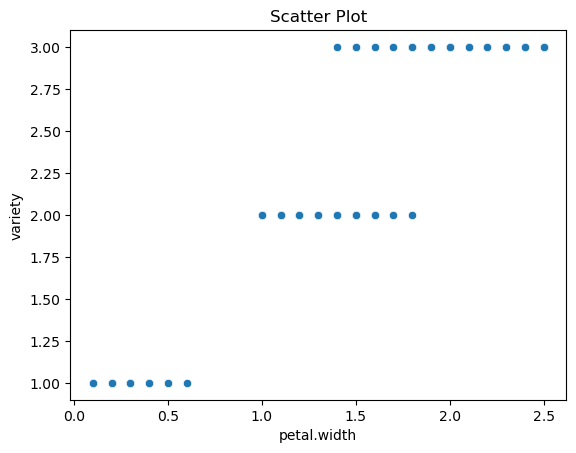

In [41]:
column_x = 'petal.width' 
column_y = 'variety'
sns.scatterplot(x=column_x, y=column_y, data=data)
plt.title('Scatter Plot')
plt.show()

In [42]:
#The columns with low correlation value are dropped and not considered for distance calculations
new_data = data.drop('sepal.width',axis=1)

In [43]:

new_data2 = new_data.drop('variety',axis=1)

In [44]:
X = new_data2

In [45]:
y = data.variety


In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: variety, Length: 150, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
len(X_train)

120

In [49]:
X_train

,sepal.length,petal.length,petal.width,Distance,UniqueID
91,6.1,4.6,1.4,None,92
135,7.7,6.1,2.3,None,136
69,5.6,3.9,1.1,None,70
128,6.4,5.6,2.1,None,129
114,5.8,5.1,2.4,None,115
...,...,...,...,...,...
133,6.3,5.1,1.5,None,134
137,6.4,5.5,1.8,None,138
72,6.3,4.9,1.5,None,73
140,6.7,5.6,2.4,None,141


In [50]:
#The value of k is taken 7 for HL-KNN
k = 7 

In [51]:
len(X_test)

30

In [52]:
X_test

,sepal.length,petal.length,petal.width,Distance,UniqueID
14,5.8,1.2,0.2,None,15
98,5.1,3.0,1.1,None,99
75,6.6,4.4,1.4,None,76
16,5.4,1.3,0.4,None,17
131,7.9,6.4,2.0,None,132
56,6.3,4.7,1.6,None,57
141,6.9,5.1,2.3,None,142
44,5.1,1.9,0.4,None,45
29,4.7,1.6,0.2,None,30
120,6.9,5.7,2.3,None,121


In [53]:
#This function calculates the euclidean distance between test row(passed as argument to the function) and each of the training rows. Returns the list of all distances for all the rows of training data.
def calculate_euclidean_distance(training_features, test_features):
    dist_arr = []
    for i in range(0,len(training_features)):
        tf = training_features.iloc[i,:-2]
        
        dist = np.sqrt(np.sum(np.square(test_features - tf)))
        dist_arr.append(dist) 
        #training_features.at[i, 'Distance'] = dist  
    return dist_arr

In [54]:
#This function calculates the number of occurences of each of the k-nearest neighbors class and 
#retruns the class value that has maximum occurence. The version 1 improvement to the code is implemented in this function.
def high_level_knn_modified (X_train,X_test,y_train):
    dist_arr = []
    predict_arr = []
    dist_arr1 = []
    arr1 = []
    result = pd.DataFrame()
    result['Outcome'] = y_train
    predicted_testdata = pd.DataFrame()
    for i in range(0,len(X_test)):
        test = X_test.iloc[i,:-2]
        dist_arr = calculate_euclidean_distance(X_train, test)
        X_train['Distance']= dist_arr
        X_train['variety']= y_train
        df = pd.DataFrame(X_train)
        df_sorted = df.sort_values(by='Distance')
        df_top7 = df_sorted.head(7)
        arr1.append(df_top7['variety'].tolist())
        
        X_train = X_train.drop('variety',axis=1)
        if all(x == 1 for x in arr1):
            predict_arr.append(1) 
        elif all(x == 0 for x in arr1):
            predict_arr.append(0)
        else:
            for j in range(0,len(df_top7)):
                top7 = df_top7.iloc[j,:-2]
                dist_arr1 = calculate_euclidean_distance(X_train, top7)
                X_train['Distance']= dist_arr1
                X_train['variety']= y_train
                df1 = pd.DataFrame(X_train)
                df1_sorted = df1.sort_values(by='Distance')
                df1_top7 = df1_sorted.head(7)
                arr1.append(df1_top7['variety'].tolist())
                X_train = X_train.drop('variety',axis=1)
        
            count_per_inner_list = [inner_list.count(1) for inner_list in arr1]
            total_count1 = sum(count_per_inner_list)
            count_per_inner_list = [inner_list.count(2) for inner_list in arr1]
            total_count2 = sum(count_per_inner_list)
            count_per_inner_list = [inner_list.count(3) for inner_list in arr1]
            total_count3 = sum(count_per_inner_list)
        
            if total_count1 > total_count2 and total_count1 > total_count3:
                predict_arr.append(1)
            elif total_count2 > total_count1 and total_count2 > total_count3:
                predict_arr.append(2)
            elif total_count3 > total_count1 and total_count3 > total_count2:
                predict_arr.append(3)
            elif total_count1 == total_count2 and total_count1 > total_count3:
                predict_arr.append(1)
            elif total_count1 == total_count3 and total_count1 > total_count2:
                predict_arr.append(1)
            elif total_count2 == total_count1 and total_count2 > total_count3:
                predict_arr.append(2)
            elif total_count2 == total_count3 and total_count2 > total_count1:
                predict_arr.append(2)
            elif total_count3 == total_count1 and total_count3 > total_count2: 
                predict_arr.append(3)
            elif total_count3 == total_count2 and total_count3 > total_count1:
                predict_arr.append(3)
            elif total_count1 == total_count2 and total_count1 < total_count3:s
                predict_arr.append(3)
            elif total_count1 == total_count3 and total_count1 < total_count2:
                predict_arr.append(2)
            elif total_count2 == total_count1 and total_count2 < total_count3:
                predict_arr.append(3)
            elif total_count2 == total_count3 and total_count2 < total_count1:
                predict_arr.append(1)
            elif total_count3 == total_count1 and total_count3 < total_count2: 
                predict_arr.append(2)
            elif total_count3 == total_count2 and total_count3 < total_count1:
                predict_arr.append(1)
            else:
                predict_arr.append(3)
            arr1.clear()   
        
    predicted_testdata['sepal.length'] = X_test['sepal.length']
    predicted_testdata['petal.length'] = X_test['petal.length']
    predicted_testdata['petal.width'] = X_test['petal.width']
    predicted_testdata['variety'] = predict_arr

    return predicted_testdata

In [55]:
#'efficiency_test' function calculates the accuracy of the prediction made in the function "high_level_knn_modified" 
#Here I pass predicted test data and the test data and compare their 'Outcome' values. Calculate the percentage of right prediction 
#return the percentage.
def efficiency_test (predicted_testdata, X_test):
    counttt = 0
    for i in range (0,len(X_test)):
        if X_test.iloc[i,5] == predicted_test.iloc[i,3]:
            counttt = counttt +1
    percentage = (counttt/len(X_test)) * 100
    return percentage

In [56]:
# Calling the 'high_level_knn_modified' function to calculate the distance of each test data from all the training data and print the predicted test data

In [57]:
predicted_test = pd.DataFrame()
start_time = time.time()
predicted_test = high_level_knn_modified(X_train,X_test,y_train)
end_time = time.time()
predicted_test

,sepal.length,petal.length,petal.width,variety
14,5.8,1.2,0.2,1
98,5.1,3.0,1.1,2
75,6.6,4.4,1.4,2
16,5.4,1.3,0.4,1
131,7.9,6.4,2.0,3
56,6.3,4.7,1.6,2
141,6.9,5.1,2.3,3
44,5.1,1.9,0.4,1
29,4.7,1.6,0.2,1
120,6.9,5.7,2.3,3


In [58]:
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time} seconds")
X_test ['variety'] = y_test

Time taken: 7.748206853866577 seconds


In [59]:
X_test

,sepal.length,petal.length,petal.width,Distance,UniqueID,variety
14,5.8,1.2,0.2,None,15,1
98,5.1,3.0,1.1,None,99,2
75,6.6,4.4,1.4,None,76,2
16,5.4,1.3,0.4,None,17,1
131,7.9,6.4,2.0,None,132,3
56,6.3,4.7,1.6,None,57,2
141,6.9,5.1,2.3,None,142,3
44,5.1,1.9,0.4,None,45,1
29,4.7,1.6,0.2,None,30,1
120,6.9,5.7,2.3,None,121,3


In [60]:
match_percent = efficiency_test (predicted_test, X_test)

In [61]:
match_percent

100.0